<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="../images/qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a> (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h2>Оператор Амадара</h2>

[Смотреть лекцию](https://youtu.be/VKva2R5FVfI)

Примером квантового оператора для квантового подбрасывания монет является гейт Адамара. 

Он определяется как h-gate в Qiskit.

Мы реализуем все три эксперимента с помощью Qiskit. Здесь мы представляем первый и третий эксперимент. Второй эксперимент будет представлен позже.

_ Это будет шаг разминки, прежде чем ввести квантовый бит более формально._

<h3> Первый эксперимент</h3>

Наш квантовый бит (<b>кубит</b>) начинается в состоянии 0, которое отображается как $ \ket{0} = \myvector{1 \\ 0} $.

<i>$ \ket{\cdot} $ называется ket-нотацией: Ket-нотация используется для представления вектора столбца в квантовой механике.
Для заданного вектора столбцов $ \ket{v} $ его сопряженная транспозиция представляет собой вектор строк, представленный как $ \bra{v} $ (обозначение bra).
</i>

<h4> Схема с одним Адамаром </h4>

Мы проектируем схему с одним кубитом и применяем квантовое подбрасывание монет один раз.

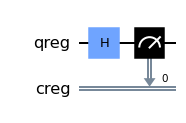

In [1]:
# Импорт всех необходимых объектов и методов для квантовых схем
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# Определение квантового регистра с одним кубитом
q =  QuantumRegister(1,"qreg")

# Определение классического регистра с одним битом
# Он хранит результат измерения квантовой части
c = ClassicalRegister(1,"creg")

# Определение квантовой схемы
qc = QuantumCircuit(q,c)

# Применение h-gate (Адамар: квантовое подбрасывание монет) к первому кубиту
qc.h(q[0])

# Измерение первого кубита и сохранение результата в первом классическом бите
qc.measure(q,c)

# Изображение схемы с помощью matplotlib
qc.draw(output='mpl') # повторно запустите ячейку, если рисунок не отображается

<img src="../images/photon1.jpg" width="40%">

{'0': 5001, '1': 4999}

Состояние 0 наблюдается с частотой % 50.01
Состояние 1 наблюдается с частотой % 49.99



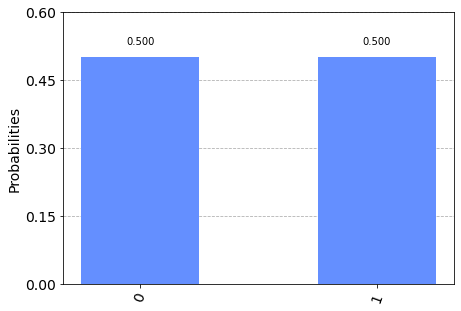

In [2]:
# Выполнение схемы 10000 раз в локальном симуляторе

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(qc)
print(counts) # Печать результатов

print()
n_zeros = counts['0']
n_ones = counts['1']
print("Состояние 0 наблюдается с частотой %",100*n_zeros/(n_zeros+n_ones))
print("Состояние 1 наблюдается с частотой %",100*n_ones/(n_zeros+n_ones))

# Покажем результат с помощью гистограммы
print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Ожидается, что числа результатов "0" и "1" будут близки друг к другу.

<img src="../images/photon2.jpg" width="40%">

<b style="color:black;"> Как мы наблюдали после этой реализации, квантовые системы выводятся вероятностно.</b>

<h3> Третий эксперимент </h3>

_ Мы рассмотрим второй эксперимент позже, потому что он требует промежуточных измерений. (Мы можем проводить промежуточные измерения в симуляторах, но это невозможно в реальных машинах.)_

Теперь мы проводим третий эксперимент.

<img src="../images/photon6.jpg" width="60%">

<h4> Схема с двумя гейтами Адамара </h4>

Мы проектируем схему с одним кубитом и дважды применяем квантовое подбрасывание монет.

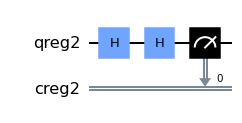

In [9]:
# Импорт всех необходимых объектов и методов для квантовых схем
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# Определение квантового регистра с одним кубитом
q2 =  QuantumRegister(1,"qreg2")

# Определение классического регистра с одним битом
# Он хранит результат измерения квантовой части
c2 = ClassicalRegister(1,"creg2")

# Определение квантовой схемы
qc2 = QuantumCircuit(q2,c2)

# Применение h-gate (Адамар: квантовое подбрасывание монет) к первому кубиту
qc2.h(q2[0])

# Применение h-gate (Адамар: квантовое подбрасывание монет) к первому кубиту ещё раз
qc2.h(q2[0])

# Измерение первого кубита и сохранение результата в первом классическом бите
qc2.measure(q2,c2)

# Изображение схемы с помощью matplotlib
qc2.draw(output='mpl') # повторно запустите ячейку, если рисунок не отображается

In [12]:
# Выполнение схемы 10000 раз в локальном симуляторе

job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=10000)
counts2 = job.result().get_counts(qc2)
print(counts2) # Печать результатов

{'0': 10000}


<u>Единственный</u> результат должен быть "0".

<img src="../images/photon7.jpg" width="60%">

<h3> Задача 1 </h3>

Помните, что x-gate переворачивает значение кубита.

Разработайте квантовую схему с одним кубитом.

Кубит изначально установлен в $ \ket{0} $.

Установите значение кубита в $ \ket{1} $ с помощью x-gate.

Эксперимент 1: Примените один элемент Адамара, выполните измерение и выполните свою программу 10000 раз.

Эксперимент 2: Примените два элемента Адамара, произведите измерение и выполните свою программу 10000 раз.

Сравните свои результаты.

Следующие две диаграммы представляют эти эксперименты.

<table>
    <tr>
        <td><img src="../images/photon8.jpg" width="80%"></td>
        <td><img src="../images/photon9.jpg" width="70%"></td>
    </tr>
</table>

<h3>Solution</h3>

<h4>Experiment 1: x-gate, h-gate, and measurement </h4>

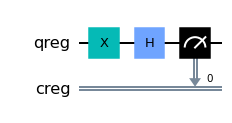

In [13]:
# Импорт всех необходимых объектов и методов для квантовых схем
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# Определение квантового регистра с одним кубитом
q =  QuantumRegister(1,"qreg")

# Определение классического регистра с одним битом
# Он хранит результат измерения квантовой части
c = ClassicalRegister(1,"creg")

# Определение квантовой схемы
qc = QuantumCircuit(q,c)

# Применение x-gate к первому кубиту
qc.x(q[0])

# Применение h-gate (Адамар: квантовое подбрасывание монет) к первому кубиту
qc.h(q[0])

# Измерение первого кубита и сохранение результата в первом классическом бите
qc.measure(q,c)

# Изображение схемы с помощью matplotlib
qc.draw(output='mpl') # повторно запустите ячейку, если рисунок не отображается

In [14]:
# Выполнение схемы 10000 раз в локальном симуляторе
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)

counts = job.result().get_counts(qc)
print(counts) # Печать результатов

{'1': 4980, '0': 5020}


<h4>Experiment 2: x-gate, h-gate, h-gate, and measurement </h4>

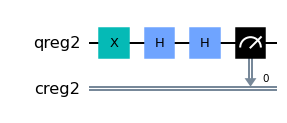

In [15]:
# Импорт всех необходимых объектов и методов для квантовых схем
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# Определение квантового регистра с одним кубитом
q2 =  QuantumRegister(1,"qreg2")

# Определение классического регистра с одним битом
# Он хранит результат измерения квантовой части
c2 = ClassicalRegister(1,"creg2")

# Определение квантовой схемы
qc2 = QuantumCircuit(q2,c2)

# Применение x-gate к первому кубиту
qc2.x(q2[0])

# Применение h-gate (Адамар: квантовое подбрасывание монет) к первому кубиту дважды
qc2.h(q2[0])
qc2.h(q2[0])

# Измерение первого кубита и сохранение результата в первом классическом бите
qc2.measure(q2,c2)

# Изображение схемы с помощью matplotlib
qc2.draw(output='mpl') # повторно запустите ячейку, если рисунок не отображается

In [16]:
# Выполнение схемы 10000 раз в локальном симуляторе
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=10000)

counts2 = job.result().get_counts(qc2)
print(counts2) # Печать результатов

{'1': 10000}
